#***Assignment 1: CO<sub>2</sub> Mauna Loa Data***


This assignment is due on Thursday 10/02/2025, before class. Change the name of your notebook to tpp_assignment_1_sunetID.ipynb Share your completed notebook with the TAs rishudh@stanford.edu and jmells@stanford.edu using the share banner at the top. For help submitting, see the canvas walkthrough. If you are still having technical difficulties, email us before the deadline.

## Introduction

In this week's assignment, we're working with ground-based sensor data from the oldest CO<sub>2</sub> monitoring station.

**The goal is to use sensor data to explore how CO<sub>2</sub> concentrations have changed over time at Mauna Loa.**

Be as quantitative as you can be in your answers.







## Datasets:
**We will be using the Mauna Loa Carbon Dioxide dataset.** This dataset was collected from 1958 to the present day. It is the longest running CO<sub>2</sub> measurement station in the world. The longevity of this dataset provides critical insights into the changes in the atmosphere resulting from changes in human activity - the burning of fossil fuels.

We are going to import the dataset and arrange it as an excel style spreadsheet or table of columns and rows, where the columns list times and measurements, so that each row contains the measurements that correspond to a single time; we will refer to this row of time and measurements as a single *data entry*. This data structure is referred to as a *dataframe* in Python.

You will have four variables, each in a column: the year that the data were collected, the month that the data were collected, and then two columns with corresponding CO<sub>2</sub> concentration measurements -  monthly averaged data and data that have been modified to remove changes in the data that are related to different times of the year.

The monthly averaged data (```monthly_average_co2```) is the average or mean of the CO<sub>2</sub> concentration values at the Mauna Loa observation site over each month. For example, there is a data point for January 1959 and a data point for February 1959. These data points do not represent one reading, which would be more susceptable to daily variations, but are instead the averages of all of the measurements made during that month.

The other CO<sub>2</sub> data available to us from the dataset is the modified data, referred to as "de-seasonalized" data (```de-seasonalized_co2```). We will look at the data so as to understand what changes in the data have been removed and why.



If you want to learn more about this dataset see: https://gml.noaa.gov/ccgg/about/co2_measurements.html




## Units:
The unit for reporting CO<sub>2</sub> is parts per million (ppm).


## Toolbox:
All the Python functions and packages you will use in this assignment are in the toolbox for the course. We add new tools to the toolbox with each assignment as new ways of analyzing and visualizing data are introduced.

https://drive.google.com/file/d/1_raeeVWt6RwWRWauS5L44ez_VWbJL3H8/view?usp=sharing

This week you will be working with data that can be organized as a table using numpy, pandas, and matplotlib (more information about these in the above linked toolbox).

## THE LEARNING GOALS FOR THE WEEK
(where the course learning goals are in plain text, and the focus this week is in italics)

● become familiar with the wide range of sensors available to study various components of the Earth system. These include sensors on satellites, aircraft, ground-based platforms, and deployed above or beneath the surface on land or water. *This week we will work with data from the land-based sensors measuring carbon dioxide in the atmospher at Mauna Loa.*

● become familiar with the basic physical principles (resolution, sampling, processing workflows, etc.) common to all sensors. *This week you will think about the impact of temporal sampling on your data.*

● work with various sources of data, learning how to access, analyze, synthesize, and describe the data to quantify trends; think critically and creatively about how to project these trends into the future. *This week you will consider how best to interpret your data and use some simple analysis tools.*

● become motivated to think about new sensors and new ways of using sensor data to study the planet. *Nothing to do here this week - this is your first assignment and first sensor data set!*


-----------------------------------------------------------------

#### 1) **Install and Import Packages**: redivis, numpy, pandas, matplotlib
Here we are bringing in all the packages/tools we will use this week. For a detailed description of what the different tools do, see the Pulse Toolbox.


In [73]:
import redivis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### 2) **Download the Data**:

We begin by downloading the dataset stored in Redivis.

In the code block below, we transform the month and year columns to give us a "datetime" object that will be easier to use when plotting. Don't worry about the manipulations that we are using here, just keep in mind what this block of code does.

In [74]:
#Downloading Dataset from Redivis

user = redivis.user("sdss")
dataset = user.dataset("geophysics_115_taking_the_pulse_of_the_planet:fg2x:v1_0")
table = dataset.table("atmosphere_data:9be7")

# Load table as a dataframe
df = table.to_pandas_dataframe(max_results=100)
df.head()

# This table contains file references, to download:
table.download_files('./taking_the_pulse_atmosphere_data/',overwrite=True)

# pull the data from the server into a useful pandas format
df_co2 = pd.read_csv('./taking_the_pulse_atmosphere_data/co2_gml.csv')
# df_co2 = pd.read_csv('./homework-data/co2_global.csv')

#-----------------------------------#
# GENERATE DATE FROM MONTHS + YEARS
import datetime

#reorganizing datetime objects
years = df_co2['year'].values.astype(int)
months = df_co2['month'].values.astype(int)
times = [datetime.date(years[ii], months[ii], 1) for ii in range(df_co2.shape[0])]
time_series = pd.to_datetime(times)

# set index to be datetime object
df_co2['time'] = time_series
df_co2.set_index('time',drop=False,inplace=True);
df_co2

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ? files/s]

0.00 (?B/s)

,year,month,monthly_average_co2,de-seasonalized_co2,time
time,,,,,
1958-03-01,1958.0,3.0,315.70,314.43,1958-03-01
1958-04-01,1958.0,4.0,317.45,315.16,1958-04-01
1958-05-01,1958.0,5.0,317.51,314.71,1958-05-01
1958-06-01,1958.0,6.0,317.24,315.14,1958-06-01
1958-07-01,1958.0,7.0,315.86,315.18,1958-07-01
...,...,...,...,...,...
2022-07-01,2022.0,7.0,418.90,418.59,2022-07-01
2022-08-01,2022.0,8.0,417.19,419.16,2022-08-01
2022-09-01,2022.0,9.0,415.95,419.50,2022-09-01


#### **3)** Plotting Multiple Variables

[link text](https://)##### **a)** Plot both of the CO<sub>2</sub> variables on the same plot so that you can easily compare them. Describe in your own words what the difference is between the two.

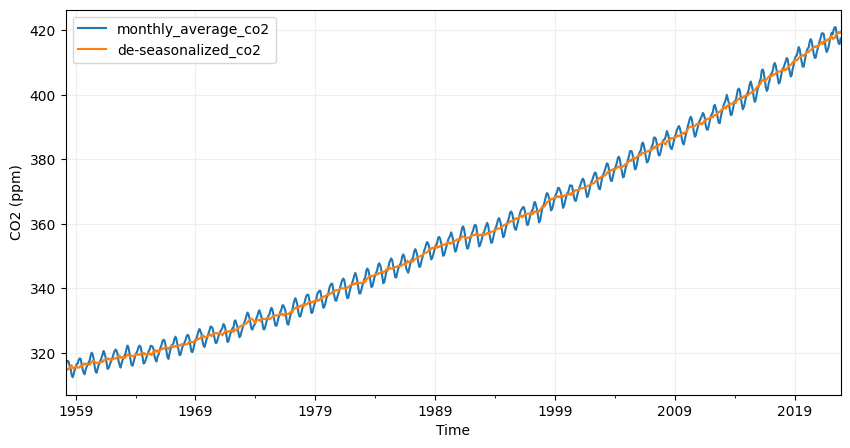

In [75]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2.plot(y='monthly_average_co2',ax=ax)
df_co2.plot(y='de-seasonalized_co2',ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 (ppm)")
ax.set_xlabel("Time")
ax.legend();

The difference between monthly average CO2 and de-seasonalized CO2 is that the first simply averages the actual recorded CO2 data seen for each month across all the years. In the blue line above (which represents monthly average CO2), we see their are peaks and low points throughout each year, which represents the natural fluctuations in atmospheric CO2 throughout the year. There is typically lower atmospheric CO2 rates during warmer months because of increased photosynthesis from plants.

De-seasonalized CO2 averages the CO2 values to smooth out these fluctations throughout the years, so we can see the trends over multiple years (as a product of climate change) rather than during the year (as a product of natural carbon cycle processes).

##### **b)** Let's zoom in and look at one year of monthly CO<sub>2</sub> data. The code below is used to select your year (we chose 2008 to 2009, but you can change this to whichever year you like).

In [76]:
lower_limit = datetime.date(2008, 1, 1)
upper_limit = datetime.date(2009,1,1)

Now let's plot the CO<sub>2</sub> variables like you did in part a, but setting the x limits to contain only the year you selected above. Note that you may also need to set your y limits so that you can better visualize the data.

(383.0, 390.0)

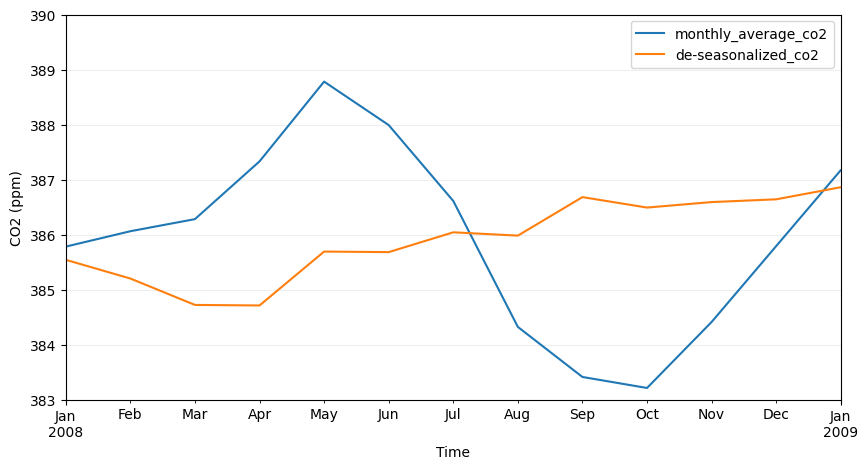

In [77]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2.plot(y='monthly_average_co2',ax=ax)
df_co2.plot(y='de-seasonalized_co2',ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 (ppm)")
ax.set_xlabel("Time")
ax.set_xlim(lower_limit,upper_limit)
ax.set_ylim(383,390)

#### **4)** Averaging

##### **a)** Calculate the mean of the monthly average CO<sub>2</sub> concentration data

In [78]:
mean = df_co2['monthly_average_co2'].mean()
print(f'The mean of the monthly average CO2 concentration data is {round(mean, 2)} ppm!')

The mean of the monthly average CO2 concentration data is 357.66 ppm!


#### **5)** Data Analysis: Creating Groups of Data

In this section, we will explore a new way of removing the seasonal variations by looking at yearly means of the monthly data. To do this we will use the function “groupby.” Groupby is a function that operates on a dataframe that has many columns and pulls out groups of the data that have similarities. In this first use of the groupby function, we will group our data by year, pulling out all data entries that have the same year, so that we can operate on those groups. The example below shows us grouping by year and getting the group of data entries for the year 2001. Notice the years on the output are all 2001.

In [79]:
df_co2_grouped_year = df_co2.groupby('year')
df_co2_grouped_year.get_group(2001)

,year,month,monthly_average_co2,de-seasonalized_co2,time
time,,,,,
2001-01-01,2001.0,1.0,370.76,370.60,2001-01-01
2001-02-01,2001.0,2.0,371.69,370.95,2001-02-01
2001-03-01,2001.0,3.0,372.63,371.06,2001-03-01
2001-04-01,2001.0,4.0,373.55,370.99,2001-04-01
2001-05-01,2001.0,5.0,374.03,371.11,2001-05-01
2001-06-01,2001.0,6.0,373.40,371.17,2001-06-01
2001-07-01,2001.0,7.0,371.68,371.08,2001-07-01
2001-08-01,2001.0,8.0,369.78,371.39,2001-08-01
2001-09-01,2001.0,9.0,368.34,371.61,2001-09-01


 One reason groupby is so useful is that we can perform actions on this group of data that we pull out of our set.

:##### **a)** Choose three years throughout the dataset to compare the yearly average of the grouped data we just created using the function mean() (see Toolbox). What do you notice about the relationship between these concentrations?

In [80]:
mean_1958 = df_co2_grouped_year.get_group(1958)['monthly_average_co2'].mean()
print(f'The yearly average of CO2 concentration in 1958 is {round(mean_1958, 2)} ppm!')
mean_2006 = df_co2_grouped_year.get_group(2006)['monthly_average_co2'].mean()
print(f'The yearly average of CO2 concentration in 2006 is {round(mean_2006, 2)} ppm!')
mean_2022 = df_co2_grouped_year.get_group(2022)['monthly_average_co2'].mean()
print(f'The yearly average of CO2 concentration in 2022 is {round(mean_2022, 2)} ppm!')

The yearly average of CO2 concentration in 1958 is 315.23 ppm!
The yearly average of CO2 concentration in 2006 is 382.09 ppm!
The yearly average of CO2 concentration in 2022 is 418.53 ppm!


Throughout the years from 1958, the atmospheric CO2 concretation is certainly increasing. It is actually increasing at an increasing rate since the slope between the first two years is 1.39 ppm of CO2 / year while the slope between the second two years is 2.28 ppm of CO2 / year. Therefore, the CO2 concentration in the air is increasing faster now than 70 years ago, a clear indicator of climate change being sped up by human and fossil fuel-related activities outside of natural processess.

Instead of getting the group for a particular year, we can perform similar averaging operations on all of the groups. By doing the following.

In [81]:
df_co2_annual = df_co2.groupby('year')['monthly_average_co2'].mean()
df_co2_annual

,monthly_average_co2
year,
1958.0,315.232000
1959.0,315.980833
1960.0,316.910000
1961.0,317.644167
1962.0,318.454167
...,...
2018.0,408.715000
2019.0,411.654167
2020.0,414.238333


##### **b)** What does df_co2_annual look like? What does each row represent? Visualize this dataframe with a plot.

df_co2_annual is a two column dataframe with the years in one column and the average atmospheric CO2 for that year in the second column.

Text(0.5, 0, 'Time')

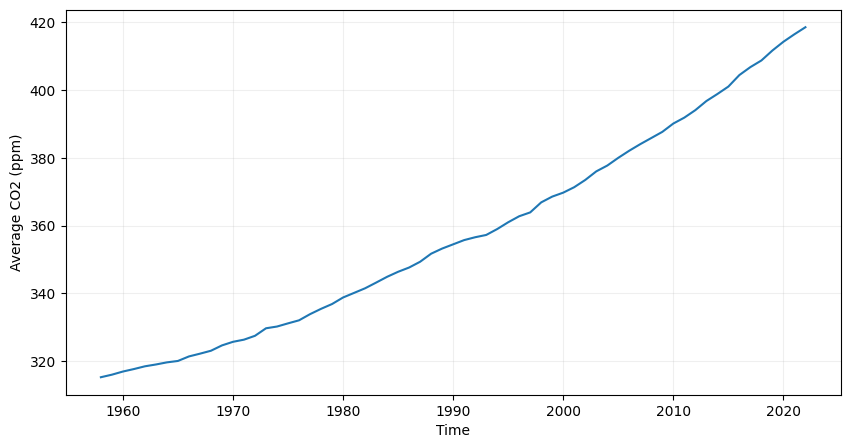

In [82]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2_annual.plot(y='monthly_average_co2', ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("Average CO2 (ppm)")
ax.set_xlabel("Time")

#### **6)** Selecting Subsets of Groupby Groups

There are many different subsets of data that one could be interested in a timeseries such as the CO<sub>2</sub> dataset we have been working with. Let's look at data from 2000 to 2011 to see what the recent CO<sub>2</sub> values look like. The following code selects a subset of the whole dataset. It does this by making a list of the years that you want to select. It then goes through each year in this list grabs all of the data entries in this year using groupby and adds them to our subset dataframe. In this code, you will only need to modify the year range that you want.


In [83]:
years = range(2013, 2023)  #make a list of years from 2000 up until not including 2011
df_subset = pd.DataFrame()  #make an empty data frame to put our new values in

#For loop to go through all of the years of interest, pull the data from those years and store it in our empty dataset
for i in years:
  df_subset = pd.concat([df_subset,df_co2.groupby('year').get_group(i)])

##### **a)** Using what we've just done in the above code block for years 2000 to 2011, plot the monthly CO<sub>2</sub> data for the years between 2013 to 2023

Text(0.5, 0, 'Time')

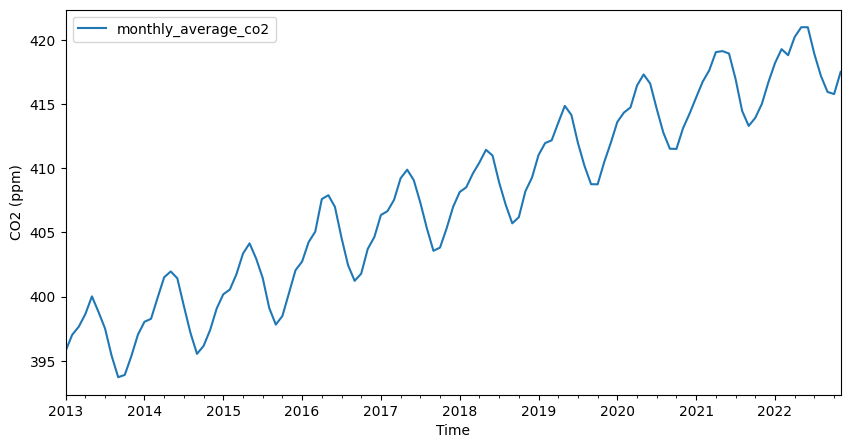

In [84]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_subset.plot(y='monthly_average_co2', ax=ax)
ax.set_ylabel("CO2 (ppm)")
ax.set_xlabel("Time")

##### **b)** Data Analysis- Linear Fit
Using the subset you just created, perform a linear fit for the monthly CO<sub>2</sub> data between 2013 to 2023 to help visualize the trend in the data (See Toolbox). Show the trend line and the data from the subset in one plot.

Text(0.5, 0, 'Time')

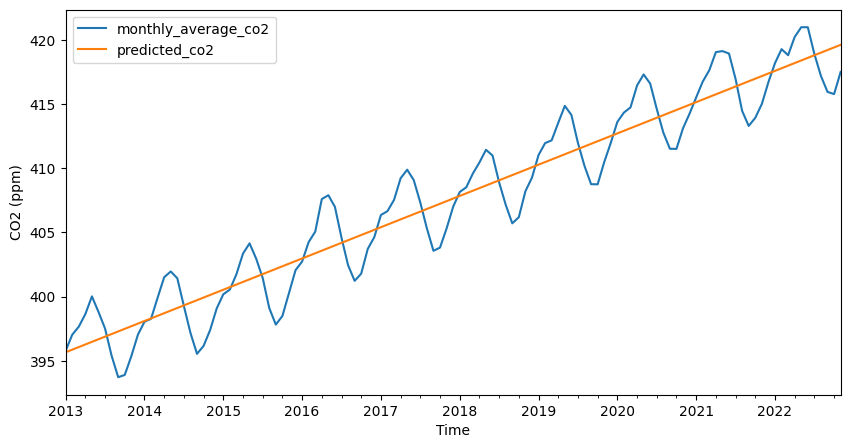

In [85]:
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

your_predicted_data, your_slope, your_intercept = linear_fit(np.array(df_subset['time']), np.array(df_subset['monthly_average_co2']).reshape([-1,1]))
your_predicted_dataframe = pd.DataFrame(index = np.array(df_subset['time']), data = your_predicted_data, columns=['predicted_co2'])

fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_subset.plot(y='monthly_average_co2', ax=ax)
your_predicted_dataframe.plot(y='predicted_co2', ax=ax)
ax.set_ylabel("CO2 (ppm)")
ax.set_xlabel("Time")

#### **7)** Making Predictions

**a)** Choosing various subsets of the data, discuss how the rate of change of CO<sub>2</sub> concentration has changed over time?

Over the past 10 years (2013-2023), there has been almost a linear increase in atmopsheric CO2 at a rate of 2.43610512 ppm per year (which I got by looking at the your_slope variable and multiplying by 12 for the year). However, when examining the yearly average CO2 over the larger set of years from 1958, displayed in the previous graph, we can see that this increase is accelerating now, or that the second derivative of the "curve" is positive along with the first derivative. If we examine the first ten years instead, for example (see code below), we see that the atmospheric CO2 increased at a rate of 0.71 ppm / year then, which is nearly 3.5 times slower than currently. Clearly, the rate of change of CO2 concentration is only increasing now than it has been before.

[0.20300876]


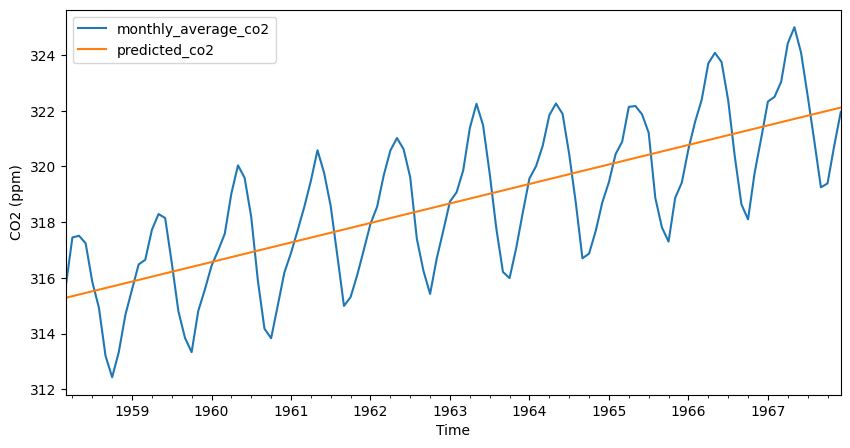

In [87]:
years = range(1958, 1968)  #make a list of years from 2000 up until not including 2011
df_subset = pd.DataFrame()  #make an empty data frame to put our new values in

#For loop to go through all of the years of interest, pull the data from those years and store it in our empty dataset
for i in years:
  df_subset = pd.concat([df_subset,df_co2.groupby('year').get_group(i)])

def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

your_predicted_data, your_slope2, your_intercept2 = linear_fit(np.array(df_subset['time']), np.array(df_subset['monthly_average_co2']).reshape([-1,1]))
your_predicted_dataframe = pd.DataFrame(index = np.array(df_subset['time']), data = your_predicted_data, columns=['predicted_co2'])

fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_subset.plot(y='monthly_average_co2', ax=ax)
your_predicted_dataframe.plot(y='predicted_co2', ax=ax)
ax.set_ylabel("CO2 (ppm)")
ax.set_xlabel("Time")

print(your_slope)

**b)** Predict the CO<sub>2</sub> concentration in 2100. Explain how you did this and why you made the decisions that you did in your method. (There is not one correct way to do this.)

If we assume that the CO2 concentration will increase at the same rate that it has been for the last 10 years, we can make a prediction using the linear fit that we created above (see code below). This would yield a prediction that the CO2 concentration in 2100 would be 607.60 ppm.

I chose this method since it allows us to extrapolate information from our linear fit, but this again is making the assumption that CO2 will grow at a linear rate. One can argue that it will only accelerate as it has now compared to some decades prior. I am hopeful and think that with regulations, new technology, and community/corporate global investment, the reality will be a lot lower than this prediction and that we can get our CO2 concentration to plateau out if not decrease.

In [103]:
year_2100 = (87 * 12) # (2100 - 2013) * 12 for months
## your_slope and your_intercept from previous linear fit (2013-2023)
CO2_2100 = your_slope * year_2100 + your_intercept
print(CO2_2100)

[607.60497258]
